In [1]:
import neat
import numpy as np
import graphviz.backend as backend
import graphviz
import os

In [2]:
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

# Verify if Python can now access dot
os.system("dot -V")

0

In [3]:
# XOR inputs and outputs
xor_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
xor_outputs = [0, 1, 1, 0]


In [4]:
import graphviz

def draw_net(config, genome, filename, node_names=None):
    """Visualize the network using graphviz."""
    dot = graphviz.Digraph(format="png")
    if node_names is None:
        node_names = {}

    # Add input and output nodes
    for i in range(-config.genome_config.num_inputs, 0):
        node_names[i] = f"Input {abs(i)}"
    for o in range(config.genome_config.num_outputs):
        node_names[o] = f"Output {o}"

    # Add all nodes
    for node in genome.nodes:
        label = node_names.get(node, str(node))
        shape = "ellipse" if node >= 0 else "box"  # Output nodes = ellipse, input = box
        dot.node(str(node), label, shape=shape)

    # Add all connections
    for (src, dest), conn in genome.connections.items():
        if conn.enabled:  # Only draw enabled connections
            weight = f"{conn.weight:.2f}"
            dot.edge(str(src), str(dest), label=weight)

    # Save the graph
    dot.render(filename, cleanup=True)
    print(f"Network saved as {filename}.png")


In [5]:
def save_best_network(genome, config, generation):
    filename = f"genome_pics/best_genome_gen_{generation}"
    draw_net(config, genome, filename)  # Call the custom visualization function


In [6]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        # Create a neural network from the genome
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        # Calculate fitness
        fitness = 4.0  # Start with max fitness
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)  # Get the network's prediction
            fitness -= (output[0] - xo) ** 2  # Penalize error (squared error)
        
        # Assign fitness to the genome
        genome.fitness = fitness


In [7]:
config_path = "config-feedforward.txt"  # Replace with your file's path
config = neat.Config(neat.DefaultGenome, 
                     neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, 
                     neat.DefaultStagnation, 
                     config_path)


population = neat.Population(config)
stats = neat.StatisticsReporter()
population.add_reporter(stats)
population.add_reporter(neat.StdOutReporter(True))

In [8]:
for generation in range(150):  # Replace 150 with the desired number of generations
    # Run one generation at a time
    population.run(eval_genomes, 1)

    # Track the best genome in the current generation
    best_genome = None
    highest_fitness = -float('inf')  # Reset for each generation

    for genome_id, genome in population.population.items():
        if genome.fitness is not None and genome.fitness > highest_fitness:
            highest_fitness = genome.fitness
            best_genome = genome

    # Save the best genome visualization for the current generation
    if best_genome is not None:  # Ensure a valid genome exists
        save_best_network(best_genome, config, generation)



 ****** Running generation 0 ****** 

Population's average fitness: 2.18904 stdev: 0.35611
Best fitness: 2.99204 - size: (1, 2) - species 1 - id 121
Average adjusted fitness: 0.545
Mean genetic distance 1.232, standard deviation 0.469
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.545     0
Total extinctions: 0
Generation time: 0.008 sec
Network saved as genome_pics/best_genome_gen_0.png

 ****** Running generation 1 ****** 

Population's average fitness: 2.30910 stdev: 0.35834
Best fitness: 2.99977 - size: (1, 2) - species 1 - id 155
Average adjusted fitness: 0.633
Mean genetic distance 1.350, standard deviation 0.572
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.633     0
Total extinctions: 0
Generation time: 0.005 sec (0.007 average)
Network saved as genome_pics/best

In [ ]:
#winner = population.run(eval_genomes, 150)  # Run for up to 100 generations
#print('\nBest genome:\n{!s}'.format(winner))


In [17]:
# Create the best network
best_net = neat.nn.FeedForwardNetwork.create(winner, config)

# Test on XOR inputs
for xi, xo in zip(xor_inputs, xor_outputs):
    prediction = best_net.activate(xi)
    print(f"Input: {xi}, Predicted: {prediction[0]:.4f}, Expected: {xo}")


Input: (0, 0), Predicted: 0.0000, Expected: 0
Input: (0, 1), Predicted: 1.0000, Expected: 1
Input: (1, 0), Predicted: 1.0000, Expected: 1
Input: (1, 1), Predicted: 0.0000, Expected: 0


In [24]:
def draw_net(config, genome, filename='network'):
    dot = graphviz.Digraph(format='png')
    
    # Add input nodes
    for i in range(-config.genome_config.num_inputs, 0):
        dot.node(str(i), f"Input {abs(i)}", shape='circle')

    # Add output nodes
    for o in range(config.genome_config.num_outputs):
        dot.node(str(o), f"Output {o}", shape='circle')

    # Add hidden nodes
    for node in genome.nodes.keys():
        if node >= 0:  # Hidden nodes have non-negative indices
            dot.node(str(node), f"Node {node}", shape='circle')

    # Add edges with weights
    for (src, dest), conn in genome.connections.items():
        if conn.enabled:
            dot.edge(str(src), str(dest), label=f"{conn.weight:.2f}")

    # Render the network
    dot.render(filename, cleanup=True)
    print(f"Network visualization saved as {filename}.png")


In [25]:
draw_net(config, winner, filename='best_genome')


Network visualization saved as best_genome.png


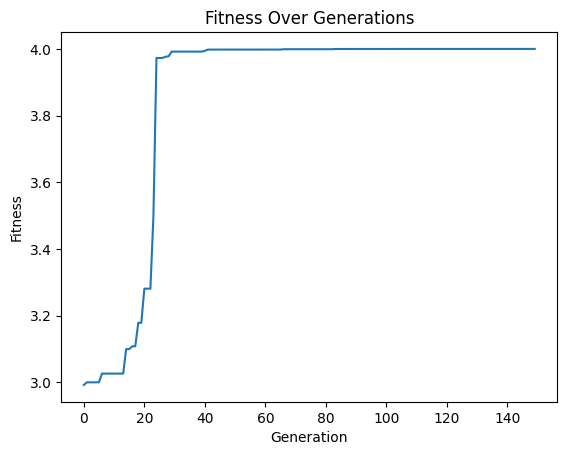

In [9]:
import matplotlib.pyplot as plt

generations = range(len(stats.most_fit_genomes))
fitness_scores = [genome.fitness for genome in stats.most_fit_genomes]

plt.plot(generations, fitness_scores)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Over Generations")
plt.show()


In [26]:
import graphviz

# Function to save a network visualization
def save_best_network(genome, config, generation):
    filename = f"best_genome_gen_{generation}"
    dot = graphviz.Digraph(format='png')
    node_names = {0: "Output"}  # Customize node names if needed
    for i in range(-config.genome_config.num_inputs, 0):
        node_names[i] = f"Input {abs(i)}"
    dot = neat.visualize.draw_net(config, genome, True, node_names=node_names)
    dot.render(filename, cleanup=True)
    print(f"Saved best network for generation {generation} as {filename}.png")


In [1]:
from PIL import Image
import os

resized_folder = "genome_pics/resized"

for file in os.listdir(resized_folder):
    if file.endswith(".png"):
        filepath = os.path.join(resized_folder, file)
        try:
            with Image.open(filepath) as img:
                print(f"{file}: {img.size}")
        except Exception as e:
            print(f"Error with {file}: {e}")


best_genome_gen_0.png: (640, 480)
best_genome_gen_1.png: (640, 480)
best_genome_gen_10.png: (640, 480)
best_genome_gen_100.png: (640, 480)
best_genome_gen_101.png: (640, 480)
best_genome_gen_102.png: (640, 480)
best_genome_gen_103.png: (640, 480)
best_genome_gen_104.png: (640, 480)
best_genome_gen_105.png: (640, 480)
best_genome_gen_106.png: (640, 480)
best_genome_gen_107.png: (640, 480)
best_genome_gen_108.png: (640, 480)
best_genome_gen_109.png: (640, 480)
best_genome_gen_11.png: (640, 480)
best_genome_gen_110.png: (640, 480)
best_genome_gen_111.png: (640, 480)
best_genome_gen_112.png: (640, 480)
best_genome_gen_113.png: (640, 480)
best_genome_gen_114.png: (640, 480)
best_genome_gen_115.png: (640, 480)
best_genome_gen_116.png: (640, 480)
best_genome_gen_117.png: (640, 480)
best_genome_gen_118.png: (640, 480)
best_genome_gen_119.png: (640, 480)
best_genome_gen_12.png: (640, 480)
best_genome_gen_120.png: (640, 480)
best_genome_gen_121.png: (640, 480)
best_genome_gen_122.png: (640, 480)

In [10]:
from PIL import Image
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip
import os

# Path to the folder containing genome images
image_folder = "genome_pics"
output_video = "genome_evolution.mp4"
fps = 2  # Frames per second

def preprocess_images(image_folder, target_size):
    """Resize all images in the folder to the target size."""
    resized_folder = os.path.join(image_folder, "resized")
    os.makedirs(resized_folder, exist_ok=True)

    for file in os.listdir(image_folder):
        if file.endswith(".png"):
            filepath = os.path.join(image_folder, file)
            try:
                with Image.open(filepath) as img:
                    resized_img = img.resize(target_size, Image.Resampling.LANCZOS)
                    resized_img.save(os.path.join(resized_folder, file))
                    print(f"Resized {file} to {resized_img.size}")  # Log image size
            except Exception as e:
                print(f"Error processing {file}: {e}")

    return resized_folder


def generate_video(image_folder, output_video, fps=5):
    # Preprocess images to ensure consistent size
    #target_size = (640, 480)  # Specify the desired size
    #resized_folder = preprocess_images(image_folder, target_size)

    # Get all PNG files from the resized folder, sorted numerically by generation number
    image_files = sorted(
        [os.path.join('genome_pics/resized', f) for f in os.listdir('genome_pics/resized') if f.endswith(".png")],
        key=lambda x: int(os.path.basename(x).split("_")[-1].split(".")[0])  # Extract numeric part
    )

    if not image_files:
        print("No images found in the folder. Please ensure the folder contains .png files.")
        return

    # Create a video from the images
    print(f"Creating video with {len(image_files)} frames at {fps} FPS...")
    clip = ImageSequenceClip(image_files, fps=fps)
    clip.write_videofile(output_video, codec="libx264")

    print(f"Video saved as {output_video}.")


# Call the function
if __name__ == "__main__":
    generate_video(image_folder, output_video, fps)


No images found in the folder. Please ensure the folder contains .png files.


In [3]:
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip

image_files = [os.path.join("genome_pics/resized", f) for f in os.listdir("genome_pics/resized") if f.endswith(".png")]

for img_path in image_files:
    try:
        from PIL import Image
        with Image.open(img_path) as img:
            print(f"{img_path}: {img.size}, {img.mode}")
    except Exception as e:
        print(f"Error with {img_path}: {e}")

# Try to load into MoviePy
clip = ImageSequenceClip(image_files, fps=5)
clip.write_videofile("output_video.mp4", codec="libx264")


genome_pics/resized\best_genome_gen_0.png: (640, 480), RGBA
genome_pics/resized\best_genome_gen_1.png: (640, 480), RGBA
genome_pics/resized\best_genome_gen_10.png: (640, 480), RGBA
genome_pics/resized\best_genome_gen_100.png: (640, 480), RGBA
genome_pics/resized\best_genome_gen_101.png: (640, 480), RGBA
genome_pics/resized\best_genome_gen_102.png: (640, 480), RGB
genome_pics/resized\best_genome_gen_103.png: (640, 480), RGB
genome_pics/resized\best_genome_gen_104.png: (640, 480), RGB
genome_pics/resized\best_genome_gen_105.png: (640, 480), RGB
genome_pics/resized\best_genome_gen_106.png: (640, 480), RGB
genome_pics/resized\best_genome_gen_107.png: (640, 480), RGB
genome_pics/resized\best_genome_gen_108.png: (640, 480), RGB
genome_pics/resized\best_genome_gen_109.png: (640, 480), RGB
genome_pics/resized\best_genome_gen_11.png: (640, 480), RGBA
genome_pics/resized\best_genome_gen_110.png: (640, 480), RGB
genome_pics/resized\best_genome_gen_111.png: (640, 480), RGB
genome_pics/resized\best

Exception: MoviePy: ImageSequenceClip requires all images to be the same size

In [27]:
import shutil
shutil.rmtree("genome_pics/resized")


In [29]:
def preprocess_images(image_folder, target_size):
    """Resize and re-save all images to ensure consistent size and mode."""
    resized_folder = os.path.join(image_folder, "resized")
    os.makedirs(resized_folder, exist_ok=True)

    for file in os.listdir(image_folder):
        if file.endswith(".png"):
            filepath = os.path.join(image_folder, file)
            try:
                with Image.open(filepath) as img:
                    img = img.convert("RGB")  # Force RGB mode
                    resized_img = img.resize(target_size, Image.Resampling.LANCZOS)
                    resized_img.save(os.path.join(resized_folder, file), "PNG")
                    print(f"Processed {file} to {resized_img.size} and RGB mode")
            except Exception as e:
                print(f"Error processing {file}: {e}")

    return resized_folder


In [30]:
preprocess_images("genome_pics", (640, 480))


'genome_pics\\resized'

In [7]:
generate_video("genome_pics", "genome_evolution.mp4", fps=5)


Creating video with 150 frames at 5 FPS...
MoviePy - Building video genome_evolution.mp4.
MoviePy - Writing video genome_evolution.mp4



MoviePy - Done !
MoviePy - video ready genome_evolution.mp4
Video saved as genome_evolution.mp4.


In [21]:
best_genome

NameError: name 'best_genome' is not defined

In [13]:
for node_id, node in best_genome.nodes.items():
    print(f'node: {node_id}, bias: {node.bias}')

node: 0, bias: -2.840808902074387
node: 132, bias: -5.144338995545113
node: 2641, bias: 1.4859395100676465
